In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from keras.models import Sequential
from keras import layers
import keras

2025-01-31 14:12:51.506314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738329171.520453  112099 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738329171.524574  112099 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 14:12:51.537810: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
PATH_DESCRIPTIONS_CLEAN = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/topic_modeling/data/episodes_description.csv"
PATH_IMDB_RATINGS_CLEAN = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/data/episodes.json"


df_descriptions = pd.read_csv(PATH_DESCRIPTIONS_CLEAN)
df_imdb_ratings = pd.read_json(PATH_IMDB_RATINGS_CLEAN , orient="index")


In [3]:
df_descriptions["rating"] = pd.Series(list(df_imdb_ratings["rating"]))
df = df_descriptions
df = df.dropna()
df

,Unnamed: 0,title,text,rating
0,0,Pilot,middle night obviously drunk rick bursts morty...,7.9
1,1,Lawnmower Dog,jerry complains family dog snuffles stupid r...,8.6
2,2,Anatomy Park (Episode),"christmas jerry tries enforce idea "" human hol...",8.3
3,3,M. Night Shaym-Aliens!,episode opens rick dissecting large rat garage...,8.6
4,4,Meeseeks and Destroy,mr meeseeks existing solve beth ’s problemafte...,9.0
...,...,...,...,...
66,66,Rickfending Your Mort,morty finds rick drunken stupor floor garage s...,7.8
67,67,Wet Kuat Amortican Summer,"rick ’s chores ( including cleaning another "" ...",6.4
68,68,Rise of the Numbericons: The Movie,"episode starts exact way post credits scene "" ...",4.5
69,69,Mort: Ragnarick,jerry white void golden light appear front nan...,7.9


In [4]:
df["evaluation"] = (df["rating"] > 8.2).astype(int)
df

/tmp/ipykernel_112099/3675656629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["evaluation"] = (df["rating"] > 8.2).astype(int)


,Unnamed: 0,title,text,rating,evaluation
0,0,Pilot,middle night obviously drunk rick bursts morty...,7.9,0
1,1,Lawnmower Dog,jerry complains family dog snuffles stupid r...,8.6,1
2,2,Anatomy Park (Episode),"christmas jerry tries enforce idea "" human hol...",8.3,1
3,3,M. Night Shaym-Aliens!,episode opens rick dissecting large rat garage...,8.6,1
4,4,Meeseeks and Destroy,mr meeseeks existing solve beth ’s problemafte...,9.0,1
...,...,...,...,...,...
66,66,Rickfending Your Mort,morty finds rick drunken stupor floor garage s...,7.8,0
67,67,Wet Kuat Amortican Summer,"rick ’s chores ( including cleaning another "" ...",6.4,0
68,68,Rise of the Numbericons: The Movie,"episode starts exact way post credits scene "" ...",4.5,0
69,69,Mort: Ragnarick,jerry white void golden light appear front nan...,7.9,0


In [5]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])
train

/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Unnamed: 0,title,text,rating,evaluation
24,24,Vindicators 3: The Return of Worldender,rick morty start garage cleaning multiple worm...,8.1,0
53,53,Bethic Twinstinct,following promise “ solaricks ” space beth com...,7.7,0
64,64,That's Amorte,morty holding spaghetti.the smith family enjoy...,8.3,1
56,56,JuRicksic Mort,morty late school asks rick help arrive time r...,7.8,0
14,14,Total Rickall,smith family breakfast jerry ’s older brother ...,9.5,1
63,63,Air Force Wong,rick therapy dr wong gets call president curti...,6.8,0
28,28,Morty's Mind Blowers,episode starts rick morty run strange humanoid...,8.9,1
18,18,Interdimensional Cable 2: Tempting Fate,eating pint cherry garcia ice cream actually c...,7.6,0
60,60,Ricktional Mortpoon's Rickmas Mortcation,christmas day uncharacteristically generous ri...,8.0,0
26,26,Rest and Ricklaxation,episode begins school morty hears jessica brok...,8.8,1


In [6]:
test

,Unnamed: 0,title,text,rating,evaluation
10,10,Ricksy Business,beth jerry leave trip experience titanic 2 r...,8.4,1
70,70,Fear No Mort,"rick morty explore "" carnival nightmares "" t...",9.4,1
5,5,Rick Potion 9,morty interested jessica lacks opportunity e...,9.1,1
34,34,Claw and Hoarder: Special Ricktim's Morty,hoisted petard.after events adventure rick mor...,7.3,0
41,41,Mort Dinner Rick Andre,mortally injured rick carried morty escape war...,9.0,1
2,2,Anatomy Park (Episode),"christmas jerry tries enforce idea "" human hol...",8.3,1
46,46,Rick & Morty's Thanksploitation Spectacular,thanksgiving rick morty break government build...,7.1,0
8,8,Something Ricked This Way Comes,smith family eating breakfast rick creates sma...,8.4,1


In [7]:
X_train = train["text"]
X_val = val["text"]
X_test = test["text"]

Y_train = train["evaluation"]
Y_val = val["evaluation"]
Y_test = test["evaluation"]

Y_train_reg = train["rating"] * 100
Y_val_reg = val["rating"] * 100
Y_test_reg = test["rating"] * 100


print(Y_test_reg)

10    840.0
70    940.0
5     910.0
34    730.0
41    900.0
2     830.0
46    710.0
8     840.0
Name: rating, dtype: float64


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

td = TfidfVectorizer(max_features = 1700)
X = td.fit_transform(df["text"].values).toarray()

In [9]:
embedded_x_train = td.fit_transform(X_train.values).toarray()
embedded_x_test = td.fit_transform(X_test.values).toarray()
embedded_test = td.fit_transform([("Hello I am Donald J Trump" * 500)] )
embedded_test

<1x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

## Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(embedded_x_train, Y_train)

MultinomialNB()

In [11]:
y_pred = classifier.predict(embedded_x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0])

## Neural Net

In [12]:
model = Sequential()
model.add(layers.Dense(100, input_shape=(1700,) , activation='relu'))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-31 14:12:53.306771: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [14]:
model.fit(np.array(embedded_x_train), np.array(Y_train), epochs=60, batch_size=10)

Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4481 - loss: 0.6941
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6097 - loss: 0.6914 
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5915 - loss: 0.6900 
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7490 - loss: 0.6886 
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8559 - loss: 0.6869 
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8281 - loss: 0.6853 
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8472 - loss: 0.6840 
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8932 - loss: 0.6829 
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9949 - loss: 0.6808 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9885 - loss: 0.6787 
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9920 - loss: 0.6743 
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9837 - loss: 0.6737 
Ep

In [15]:
test_results_nn = model.predict(embedded_x_test)
test_results_nn = [x[0] for x in test_results_nn]
test_results_nn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


[0.37049538,
 0.36121824,
 0.5010176,
 0.44210726,
 0.5871533,
 0.19736616,
 0.7522271,
 0.3120993]

In [16]:
Y_test

10    1
70    1
5     1
34    0
41    1
2     1
46    0
8     1
Name: evaluation, dtype: int64

In [17]:
model.predict(embedded_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1700, but received input with shape (1, 5)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 5), dtype=float32)
  • training=False
  • mask=None

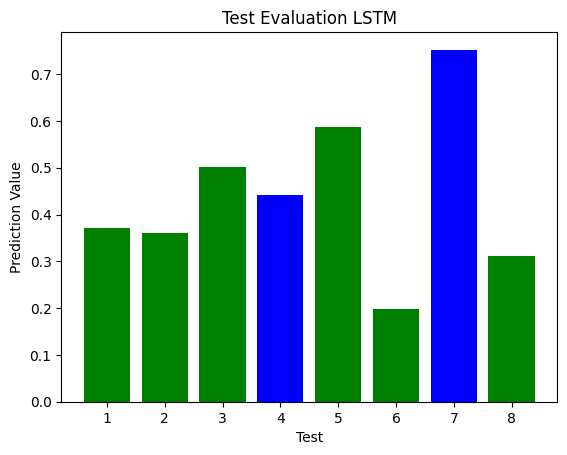

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.array(range(len(test_results_nn))) + 1

colors = ["green" if y==1 else "blue" for y in Y_test] # Green = Good Episode

plt.bar(x_axis, test_results_nn , color=colors)
plt.title('Test Evaluation LSTM')
plt.xlabel('Test')
plt.ylabel('Prediction Value')
plt.show()